**Step # 01 Clone the Depth Pro Github Repo**

In [1]:
!git clone https://github.com/apple/ml-depth-pro.git

Cloning into 'ml-depth-pro'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 48 (delta 9), reused 2 (delta 2), pack-reused 21 (from 1)
Receiving objects: 100% (48/48), 2.50 MiB | 7.22 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [2]:
%cd /content/ml-depth-pro

/content/ml-depth-pro


**Step # 02 Install All the Required Packages**

In [3]:
!pip install -e .

Obtaining file:///content/ml-depth-pro
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 105.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 97.5 MB/s eta 0:00:00
  Building editable for depth_pro (pyproject.toml) ... done
  Created wheel for depth_pro: filename=depth_pro-0.1-0.editable-py3-none-any.whl size=4834 sha256=379f494ff89321baa88666578c453795391a4cbaa4f7a6d64e32656a672d9ea2
  Stored in directory: /tmp/pip-ephem-wheel-cache-gvaid_xn/wheels/33/50/70/e123db17c15614a0cee24dd39f1dfcb9463e9eebd0d31e712b
Successfully built depth_pro
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled n

**Step # 03 Download Depth Pro Model Weights**

In [4]:
!source get_pretrained_models.sh

--2025-11-24 08:08:07--  https://ml-site.cdn-apple.com/models/depth-pro/depth_pro.pt
Resolving ml-site.cdn-apple.com (ml-site.cdn-apple.com)... 17.253.83.142, 17.253.83.144, 2620:149:a21:f000::134, ...
Connecting to ml-site.cdn-apple.com (ml-site.cdn-apple.com)|17.253.83.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1904446787 (1.8G) [binary/octet-stream]
Saving to: ‘checkpoints/depth_pro.pt’

depth_pro.pt        100%[===================>]   1.77G   204MB/s    in 19s     

2025-11-24 08:08:26 (96.5 MB/s) - ‘checkpoints/depth_pro.pt’ saved [1904446787/1904446787]



**Check the Available Options**

In [5]:
!depth-pro-run -h

usage: depth-pro-run [-h] [-i IMAGE_PATH] [-o OUTPUT_PATH] [--skip-display]
                     [-v]

Inference scripts of DepthPro with PyTorch models.

options:
  -h, --help            show this help message and exit
  -i IMAGE_PATH, --image-path IMAGE_PATH
                        Path to input image.
  -o OUTPUT_PATH, --output-path OUTPUT_PATH
                        Path to store output files.
  --skip-display        Skip matplotlib display.
  -v, --verbose         Show verbose output.


**Download Images from Drive into Google Colab Notebook**

In [6]:
!pwd

/content/ml-depth-pro


In [14]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [16]:
!gdown "/content/drive/MyDrive/Car driving on road and small passenger car seat on the road used for daily trips _ Premium Photo.jpeg" -O "Images/"

Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=/content/drive/MyDrive/Car driving on road and small passenger car seat on the road used for daily trips _ Premium Photo.jpeg

but Gdown can't. Please check connections and permissions.


In [7]:
!gdown "https://drive.google.com/uc?id=1-PNmddR4WWc2sJSRpdAmD7hnPqb7e5w4&confirm=t" -O "Images/"

Downloading...
From: https://drive.google.com/uc?id=1-PNmddR4WWc2sJSRpdAmD7hnPqb7e5w4&confirm=t
To: /content/ml-depth-pro/Images/image1.jpeg
100% 190k/190k [00:00<00:00, 4.11MB/s]


In [8]:
!gdown "https://drive.google.com/uc?id=1XxjV5f0YBakvj2FpUaDG063htonnPS1I&confirm=t" -O "Images/"

Downloading...
From: https://drive.google.com/uc?id=1XxjV5f0YBakvj2FpUaDG063htonnPS1I&confirm=t
To: /content/ml-depth-pro/Images/image2.jpeg
100% 191k/191k [00:00<00:00, 3.58MB/s]


In [9]:
!gdown "https://drive.google.com/uc?id=14Vx5L5_Sfa41ilwg_CXLsBQcDhIG2GUe&confirm=t" -O "Images/"

Downloading...
From: https://drive.google.com/uc?id=14Vx5L5_Sfa41ilwg_CXLsBQcDhIG2GUe&confirm=t
To: /content/ml-depth-pro/Images/image3.jpg
100% 148k/148k [00:00<00:00, 3.35MB/s]


(np.float64(-0.5), np.float64(625.5), np.float64(416.5), np.float64(-0.5))

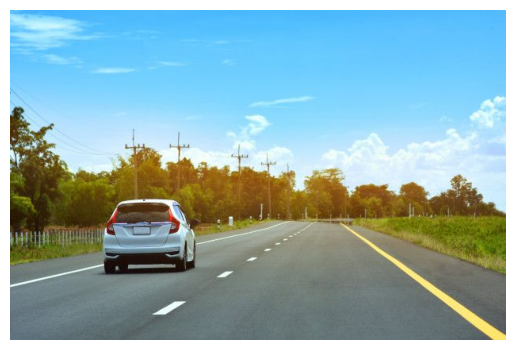

In [17]:
from PIL import Image
import matplotlib.pyplot as plt

img_path = "/content/drive/MyDrive/Car driving on road and small passenger car seat on the road used for daily trips _ Premium Photo.jpeg"

img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')


**Step # 04 Run Predictions with Depth Pro**

In [19]:
!depth-pro-run -i "Images/" -o ./output/

4it [00:06,  1.68s/it]
Figure(640x480)


In [20]:
from PIL import Image

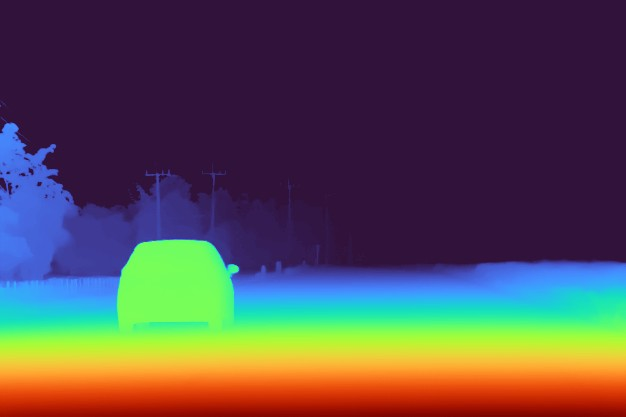

In [21]:
Image.open("/content/ml-depth-pro/output/car.jpg")

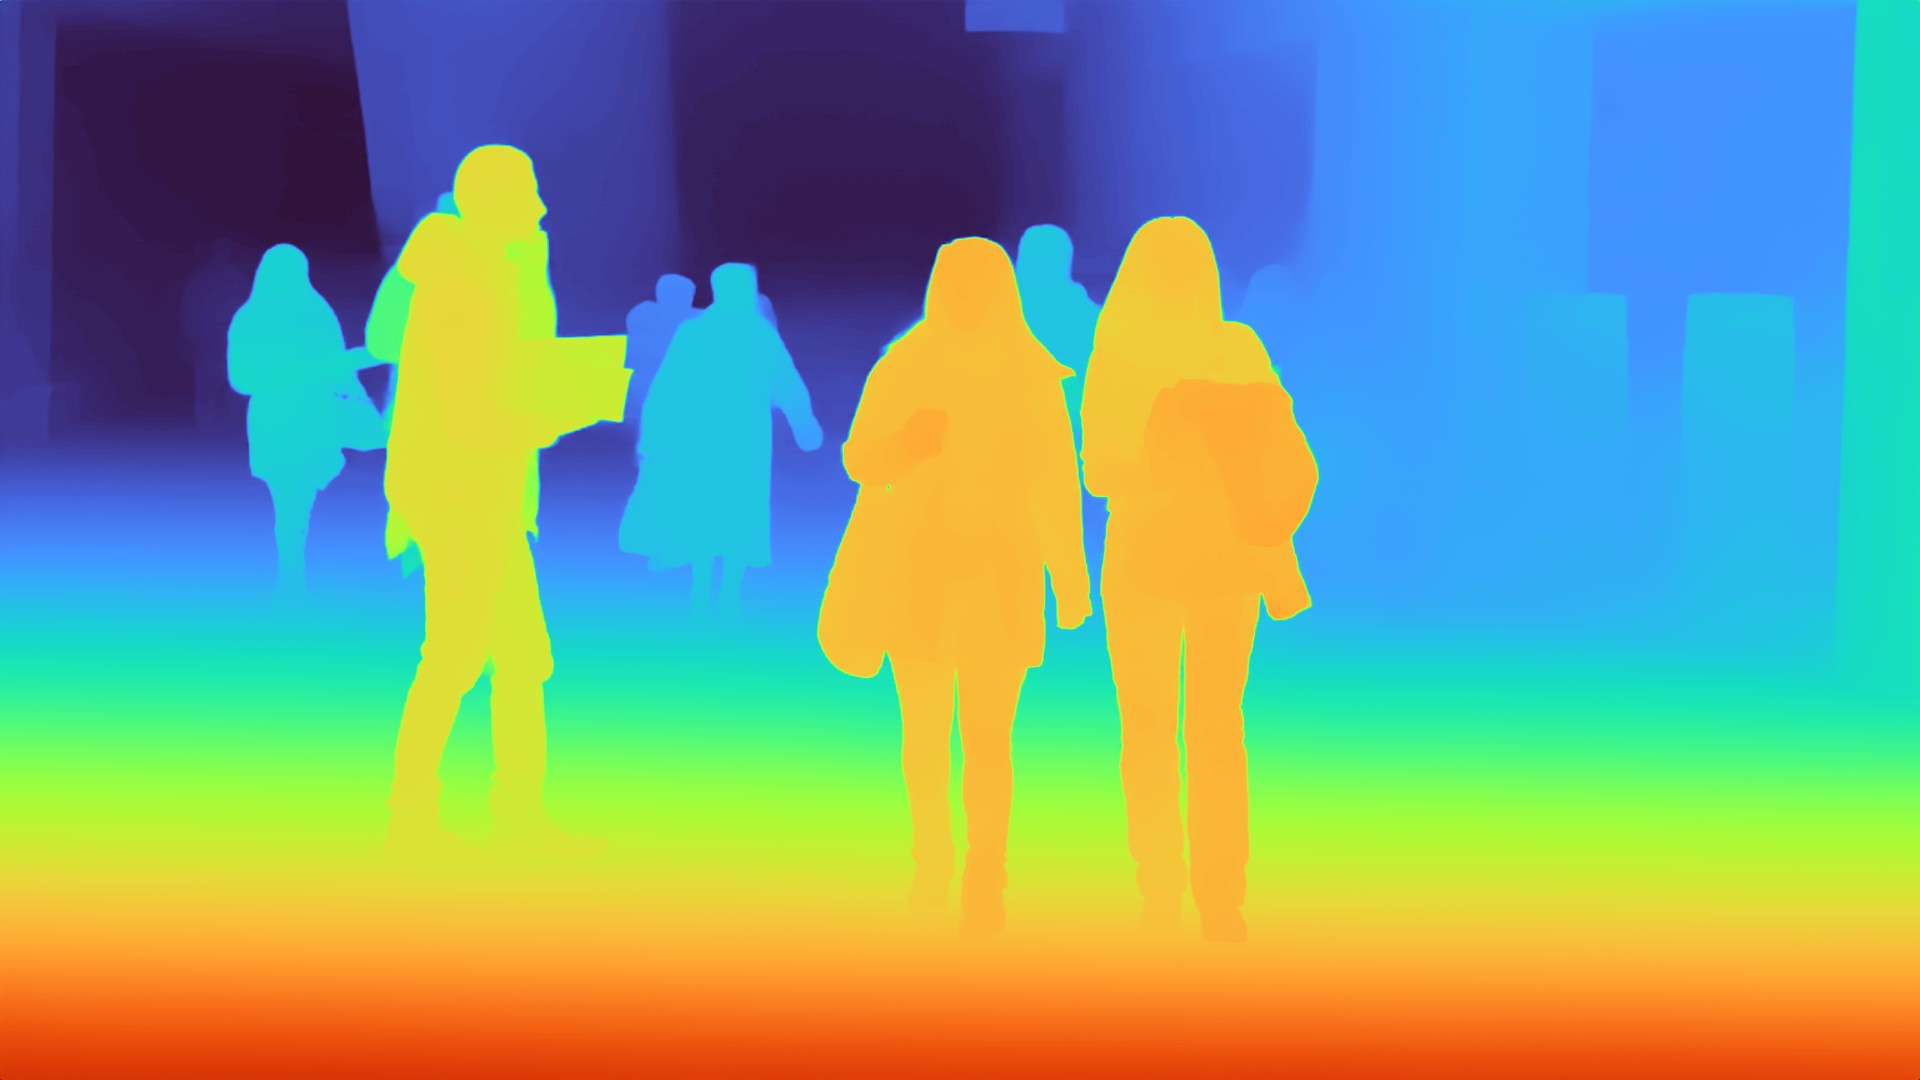

In [ ]:
Image.open("/content/ml-depth-pro/output/image2.jpg")

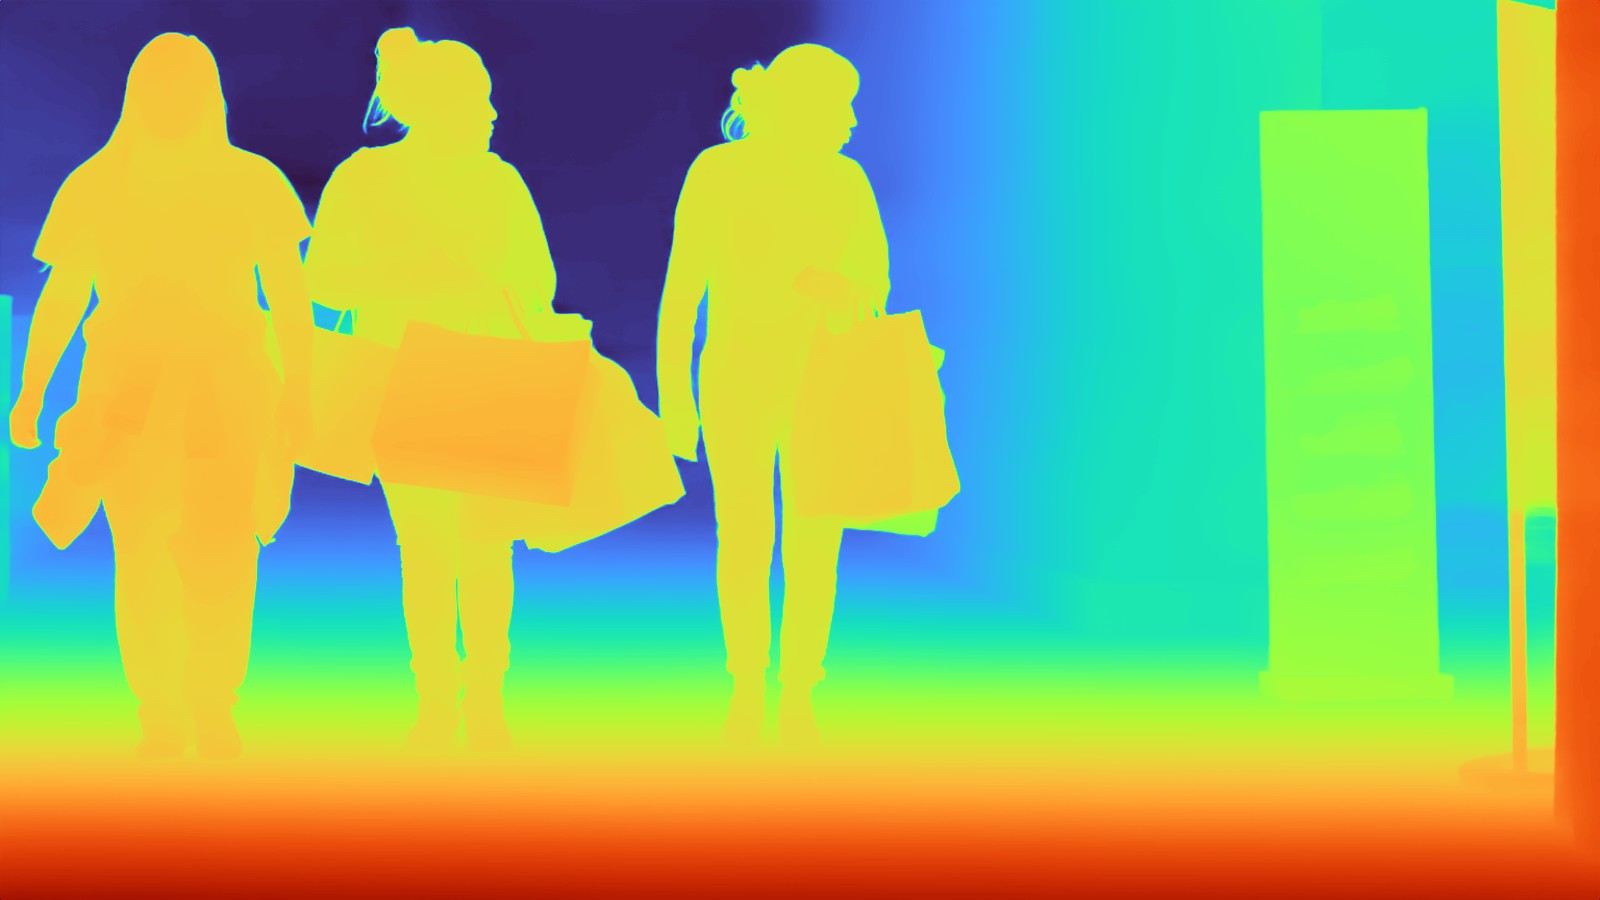

In [ ]:
Image.open("/content/ml-depth-pro/output/image3.jpg")

**Estimate Real Distance to Objects with Depth Pro and YOLO11**

**Install All the Required Packages**

In [22]:
!pip install ultralytics
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 97.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
depth-pro 0.1 requires numpy<2, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.


In [28]:
!gdown "https://drive.google.com/uc?id=1EOz41Ozl-jPZzLKdusziz9wRl6X4DI4Q&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1EOz41Ozl-jPZzLKdusziz9wRl6X4DI4Q&confirm=t
To: /content/ml-depth-pro/depth_test.py
100% 2.26k/2.26k [00:00<00:00, 9.20MB/s]


In [40]:
!python depth_test.py


0: 640x512 1 car, 56.5ms
Speed: 4.8ms preprocess, 56.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 512)
<PIL.Image.Image image mode=RGB size=500x655 at 0x7FD57B590920>
<PIL.Image.Image image mode=RGB size=500x655 at 0x7FD57B5918B0>


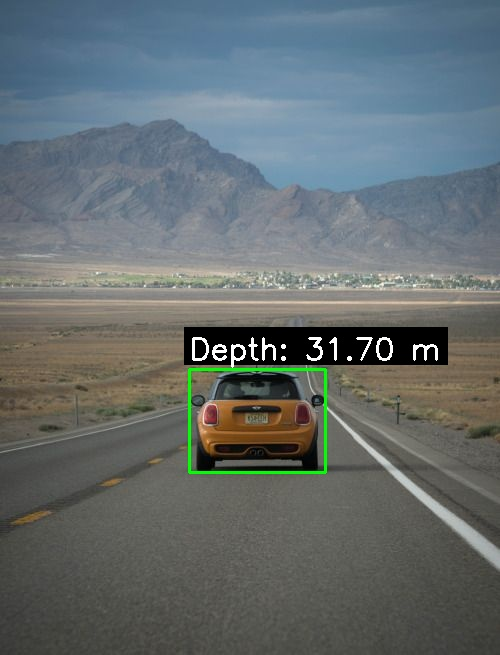

In [41]:
Image.open("/content/ml-depth-pro/depth.jpg")

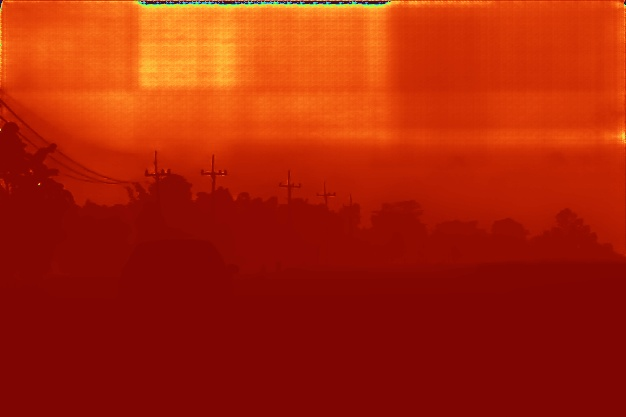

In [39]:
Image.open("/content/ml-depth-pro/depth_colormap.jpg")

In [30]:
!python depth_test.py --input "/content/drive/MyDrive/Soft hues, strong presence_ ✨ Bringing timeless….jpeg"



0: 384x640 14 persons, 1 handbag, 55.3ms
Speed: 4.4ms preprocess, 55.3ms inference, 7.2ms postprocess per image at shape (1, 3, 384, 640)
<PIL.Image.Image image mode=RGB size=1920x1080 at 0x7C3342917830>
<PIL.Image.Image image mode=RGB size=1920x1080 at 0x7C33BCB11FD0>
